## Assignment - 2
**Name - Mohammed Abuzar Younus**<br>
**Student ID - 8903244**

**1. Consider the heart disease dataset in pandas dataframe**

In [254]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score, confusion_matrix


In [255]:
# Loading the dataset
df = pd.read_csv('heart.csv')
df.head(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [256]:
# Get the number of rows and columns
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 918
Number of columns: 12


In [257]:
# Get more details about the dataset
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [258]:
# Checking for Missing Values in the data
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values in the heart dataset.

In [259]:
# Checking for and dropping duplicate values in the dataset
(df.drop_duplicates()).shape

(918, 12)

The same number of rows in the result from the previous section shows that the dataset does not contain any duplicate values.

In [260]:
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())


Summary Statistics for Numerical Columns:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR   
count  918.000000  918.000000   918.000000  918.000000  918.000000  \
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [261]:
print("\nData Types of Columns:")
print(df.dtypes)


Data Types of Columns:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


**2. Remove outliers using mean,median,Z score.**

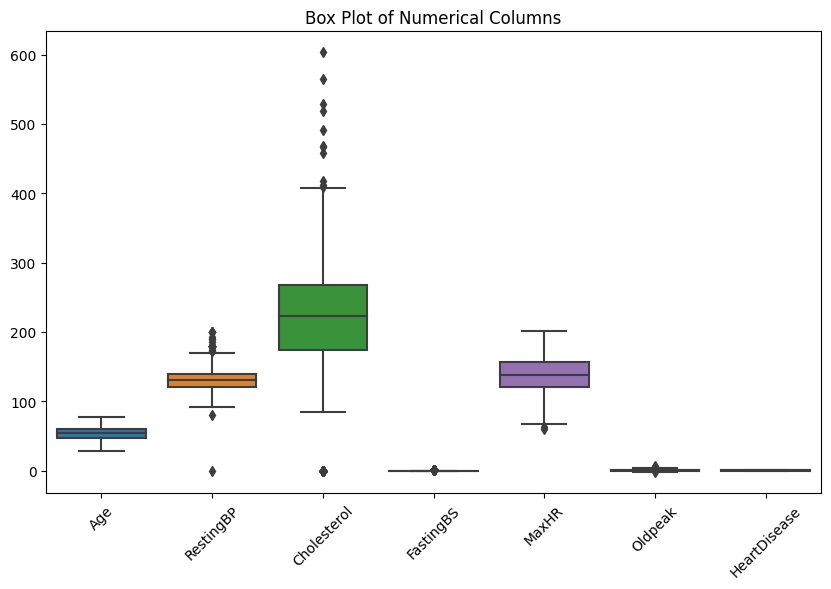

In [262]:
# Generate box plots for numerical columns to check for outliers
numerical_columns = df.select_dtypes(include='number').columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns])
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=45)
plt.show()

In [263]:
# removing the outliers using Z
from scipy.stats import zscore

# Function to remove outliers using Z-score
def remove_outliers_using_zscore(df, column, threshold=3):
    z_scores = zscore(df[column])
    df_filtered = df[(abs(z_scores) < threshold)]
    return df_filtered

# Remove outliers using Z-score for numerical columns
threshold = 3  # Adjust this threshold as needed
for column in numerical_columns:
    df = remove_outliers_using_zscore(df, column, threshold)



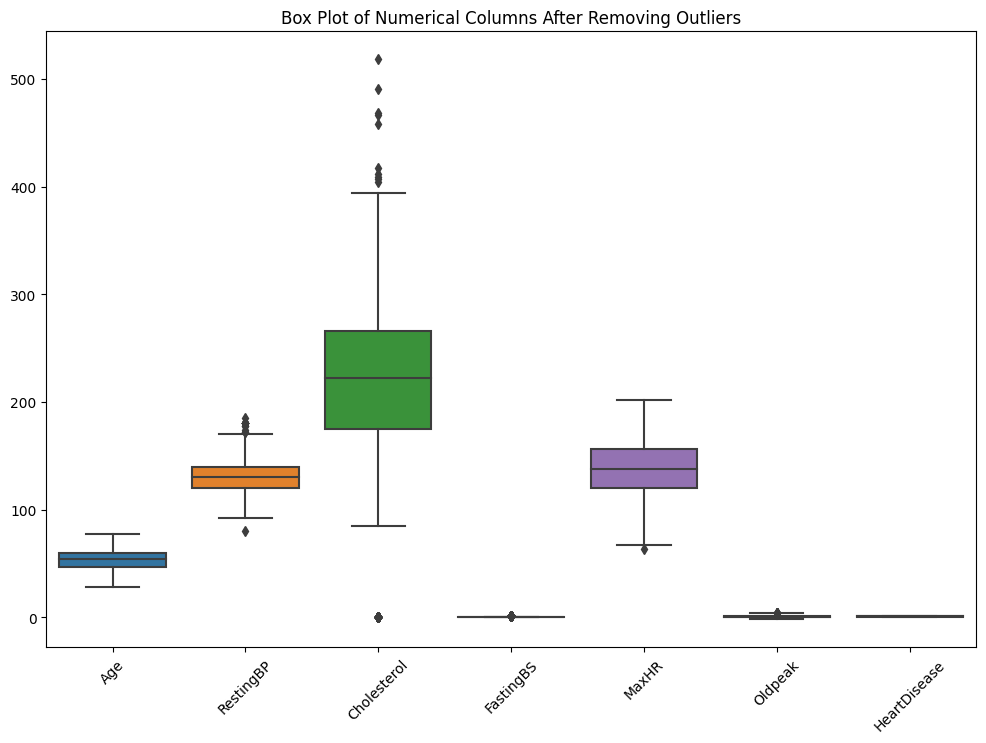

In [264]:
# Generate box plots for numerical columns after removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title("Box Plot of Numerical Columns After Removing Outliers")
plt.xticks(rotation=45)
plt.show()


In [265]:
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 899
Number of columns: 12


After using the Z-score outlier removal technique, a total of 19 outliers were eliminated from the dataset.


**3. Convert text columns to numbers using label encoding and one hot encoding**

In [266]:
from sklearn.preprocessing import LabelEncoder

# Select the text columns to be label encoded
text_columns_to_label_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Apply label encoding to the selected text columns
label_encoder = LabelEncoder()
for col in text_columns_to_label_encode:
    df[col] = label_encoder.fit_transform(df[col])


In [267]:
df.tail(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
911,59,1,0,164,176,1,0,90,0,1.0,1,1
912,57,0,0,140,241,0,1,123,1,0.2,1,1
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1
917,38,1,2,138,175,0,1,173,0,0.0,2,0


In [268]:
print(df.dtypes)

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object


In [269]:
# List of columns to one-hot encode
columns_to_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Perform one-hot encoding for the specified columns
hot_encoded_df = pd.get_dummies(df, columns=columns_to_encode)

# Convert the One-hot-encoded boolean columns to integers 1 or 0
hot_encoded_df.iloc[:, 6:] = hot_encoded_df.iloc[:, 6:].astype(int)

# Print the DataFrame after one-hot encoding with True and False
hot_encoded_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_0,Sex_1,ChestPainType_0,...,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [270]:
df = hot_encoded_df
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_0,Sex_1,ChestPainType_0,...,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


**4. Apply scaling**

In [271]:
# Separate the target column (HeartDisease) from the feature columns
target_column = 'HeartDisease'
features_columns = df.drop(columns=[target_column])

# Apply Min-Max scaling to all numerical columns (excluding the target column)
min_max_scaler = MinMaxScaler()
features_columns = min_max_scaler.fit_transform(features_columns)

# Apply Standardization (Z-score scaling) to all numerical columns (excluding the target column)
standard_scaler = StandardScaler()
features_columns = standard_scaler.fit_transform(features_columns)

# Create a new DataFrame with the scaled numerical columns and the original categorical columns
scaled_df = pd.DataFrame(features_columns, columns=df.drop(columns=[target_column]).columns)

# Add the target column back to the scaled DataFrame
scaled_df[target_column] = df[target_column]

In [272]:
scaled_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ChestPainType_0,ChestPainType_1,...,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2,HeartDisease
0,-1.428154,0.465900,0.849636,-0.550362,1.384320,-0.855469,-0.515943,0.515943,-1.077524,2.063325,...,-0.229550,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,-0.998888,1.134695,0.0
1,-0.475855,1.634714,-0.168122,-0.550362,0.752973,0.137516,1.938199,-1.938199,-1.077524,-0.484655,...,-0.229550,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,1.001113,-0.881294,1.0
2,-1.745588,-0.118507,0.793612,-0.550362,-1.535661,-0.855469,-0.515943,0.515943,-1.077524,2.063325,...,-0.229550,-0.503821,-1.235023,2.041241,0.822945,-0.822945,-0.260184,-0.998888,1.134695,0.0
3,-0.581666,0.349019,0.149344,-0.550362,-1.141069,0.634008,1.938199,-1.938199,0.928054,-0.484655,...,-0.229550,-0.503821,0.809702,-0.489898,-1.215148,1.215148,-0.260184,1.001113,-0.881294,1.0
4,0.053200,1.050307,-0.028064,-0.550362,-0.588640,-0.855469,-0.515943,0.515943,-1.077524,-0.484655,...,-0.229550,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,-0.998888,1.134695,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,-0.899099,-1.287320,0.616205,-0.550362,-0.194048,0.336112,-0.515943,0.515943,-1.077524,-0.484655,...,4.356349,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,1.001113,-0.881294,0.0
895,1.534554,0.699663,-0.046738,1.816985,0.161085,2.520678,-0.515943,0.515943,0.928054,-0.484655,...,-0.229550,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,1.001113,-0.881294,1.0
896,0.370633,-0.118507,-0.625646,-0.550362,-0.864854,0.336112,-0.515943,0.515943,0.928054,-0.484655,...,-0.229550,-0.503821,0.809702,-0.489898,-1.215148,1.215148,-0.260184,1.001113,-0.881294,0.0
897,0.370633,-0.118507,0.354763,-0.550362,1.463238,-0.855469,1.938199,-1.938199,-1.077524,2.063325,...,-0.229550,1.984833,-1.235023,-0.489898,0.822945,-0.822945,-0.260184,1.001113,-0.881294,1.0


**Understanding the class imbalance problem**

HeartDisease
1    492
0    407
Name: count, dtype: int64


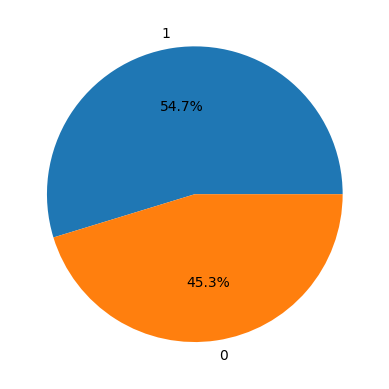

In [274]:
# Plot the diagram to check whether the dataset is balanced or not.
x = df['HeartDisease'].value_counts()
print(x)
plt.pie(x.values,
        labels = x.index,
        autopct='%1.1f%%')
plt.show()

**Finding the distribution of male and female patients in the data**

Sex_0
0    710
1    189
Name: count, dtype: int64


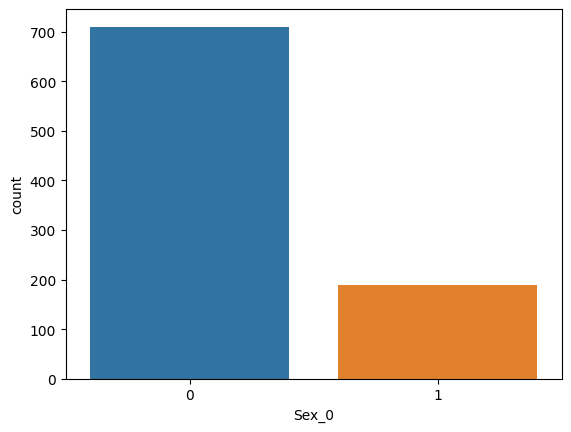

In [275]:
# Exploring the count of males and females in the data
# 1 Is number of males and 0 is number of females
value_counts = df.Sex_0.value_counts()
print(value_counts)
sns.countplot(data=df, x='Sex_0')
plt.show()

**Knowing the risk of heart disease in both men and women**

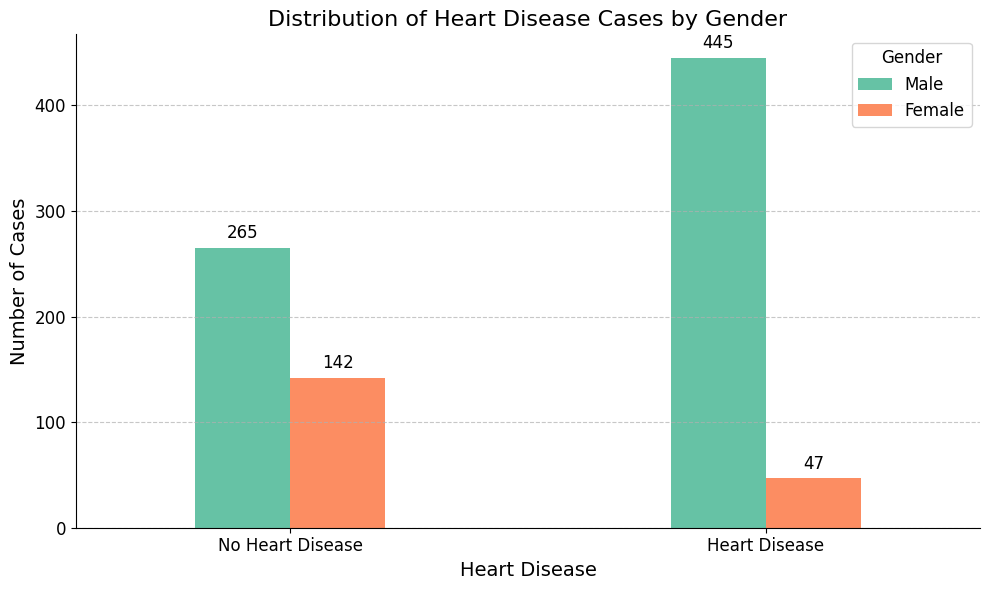

In [277]:
# Group the data by 'HeartDisease' and 'Sex', and calculate the counts
grouped = df.groupby(['HeartDisease', 'Sex_0']).size().unstack(fill_value=0)

# Create a side-by-side bar plot with enhanced styling
fig, ax = plt.subplots(figsize=(10, 6))

# Define custom colors
colors = ['#66c2a5', '#fc8d62']

# Plot the data
grouped.plot(kind='bar', ax=ax, color=colors, width=0.4)

# Title and labels
plt.title('Distribution of Heart Disease Cases by Gender', fontsize=16)
plt.xlabel('Heart Disease', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Legend
legend_labels = ['Male', 'Female']
legend = plt.legend(legend_labels, title='Gender', fontsize=12)
legend.get_title().set_fontsize(12)

# Grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Spines (remove top and right spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add data labels on top of the bars
for container in ax.containers:
    plt.bar_label(container, fmt='%.0f', fontsize=12, color='black', label_type='edge', padding=4)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**Understanding the correlations**

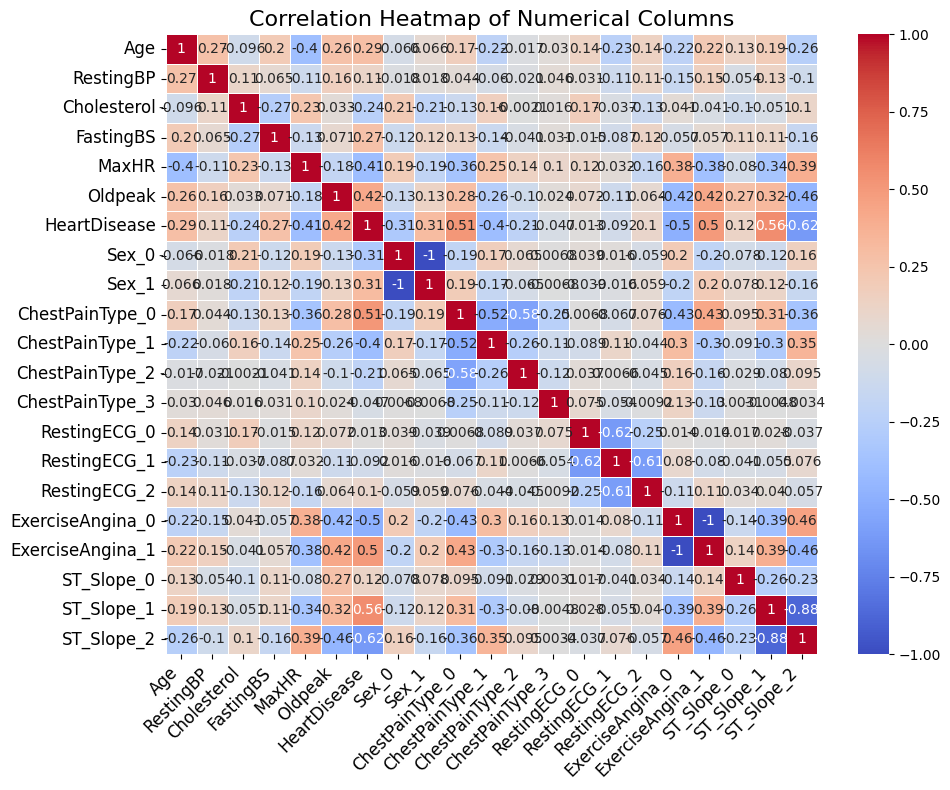

In [278]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up a color palette
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, linewidths=0.5)

# Title and layout adjustments
plt.title('Correlation Heatmap of Numerical Columns', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


**5. Build a machine learning classification model using support vector machine. Demonstrate the standalone model as well as Bagging model and include observations about the oerformance**

In [286]:
# Separate features (X) and target (y) columns
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

In [287]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((629, 20), (270, 20))

In [288]:
# Step 4.1: Standalone SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [289]:
# Step 4.2: Bagging model with SVM as the base estimator
bagging_svm_model = BaggingClassifier(base_estimator=SVC(kernel='linear', C=1.0), n_estimators=10)
bagging_svm_model.fit(X_train, y_train)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC(kernel='linear'))

In [290]:
# Evaluate the models
y_pred_svm = svm_model.predict(X_test)
y_pred_bagging_svm = bagging_svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_bagging_svm = accuracy_score(y_test, y_pred_bagging_svm)



In [291]:
print("Standalone SVM Model Accuracy:", accuracy_svm)
print("Bagging SVM Model Accuracy:", accuracy_bagging_svm)

# Print classification reports for both models
print("\nStandalone SVM Model Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nBagging SVM Model Classification Report:")
print(classification_report(y_test, y_pred_bagging_svm))

Standalone SVM Model Accuracy: 0.8518518518518519
Bagging SVM Model Accuracy: 0.8592592592592593

Standalone SVM Model Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       119
           1       0.84      0.90      0.87       151

    accuracy                           0.85       270
   macro avg       0.85      0.85      0.85       270
weighted avg       0.85      0.85      0.85       270


Bagging SVM Model Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       119
           1       0.86      0.90      0.88       151

    accuracy                           0.86       270
   macro avg       0.86      0.85      0.86       270
weighted avg       0.86      0.86      0.86       270



The Bagging SVM model exhibits slightly higher accuracy (0.859) compared to the standalone SVM model (0.852). Both models show relatively balanced precision and recall values for both classes, indicating effective classification performance. In terms of the F1-score, the Bagging SVM model tends to outperform the standalone SVM, achieving slightly higher scores for both classes. Therefore, the Bagging SVM model demonstrates better overall performance, delivering improved accuracy and better balance between precision and recall across classes.

In [292]:
# Calculate ROC curve and AUC for both models
y_prob_svm = svm_model.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

y_prob_bagging_svm = bagging_svm_model.decision_function(X_test)
fpr_bagging_svm, tpr_bagging_svm, _ = roc_curve(y_test, y_prob_bagging_svm)
roc_auc_bagging_svm = auc(fpr_bagging_svm, tpr_bagging_svm)

# Print ROC AUC scores for both models
print("\nStandalone SVM Model ROC AUC Score:", roc_auc_svm)
print("Bagging SVM Model ROC AUC Score:", roc_auc_bagging_svm)


Standalone SVM Model ROC AUC Score: 0.9145751015638044
Bagging SVM Model ROC AUC Score: 0.9116812287829038


In [ ]:
# Calculate and print confusion matrices for both models
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_bagging_svm = confusion_matrix(y_test, y_pred_bagging_svm)

print("\nStandalone SVM Model Confusion Matrix:")
print(cm_svm)

print("\nBagging SVM Model Confusion Matrix:")
print(cm_bagging_svm)


Standalone SVM Model Confusion Matrix:
[[68 18]
 [ 6 88]]

Bagging SVM Model Confusion Matrix:
[[68 18]
 [ 6 88]]


**6. Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance**

In [293]:
# Separate features (X) and target (y) columns
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

In [294]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((629, 20), (270, 20))

In [295]:
# Step 5.1: Standalone Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [296]:
# Step 5.2: Bagging model with Decision Tree as the base estimator
bagging_decision_tree_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
bagging_decision_tree_model.fit(X_train, y_train)


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [297]:

# Evaluate the models
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_bagging_decision_tree = bagging_decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_bagging_decision_tree = accuracy_score(y_test, y_pred_bagging_decision_tree)

In [298]:

print("Standalone Decision Tree Model Accuracy:", accuracy_decision_tree)
print("Bagging Decision Tree Model Accuracy:", accuracy_bagging_decision_tree)

# Print classification reports for both models
print("\nStandalone Decision Tree Model Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))

print("\nBagging Decision Tree Model Classification Report:")
print(classification_report(y_test, y_pred_bagging_decision_tree))

Standalone Decision Tree Model Accuracy: 0.7888888888888889
Bagging Decision Tree Model Accuracy: 0.837037037037037

Standalone Decision Tree Model Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       119
           1       0.83      0.79      0.81       151

    accuracy                           0.79       270
   macro avg       0.79      0.79      0.79       270
weighted avg       0.79      0.79      0.79       270


Bagging Decision Tree Model Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.83       119
           1       0.89      0.81      0.85       151

    accuracy                           0.84       270
   macro avg       0.84      0.84      0.84       270
weighted avg       0.84      0.84      0.84       270



The Bagging Decision Tree model demonstrates improved accuracy (0.837) compared to the standalone Decision Tree model (0.789). The Bagging approach enhances the precision and recall balance for both classes, leading to higher F1-scores. Consequently, the Bagging Decision Tree model achieves better overall performance with higher accuracy, improved precision and recall, and balanced F1-scores for both classes.

In [299]:
# Calculate ROC curve and AUC for both models
y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test, y_prob_decision_tree)
roc_auc_decision_tree = auc(fpr_decision_tree, tpr_decision_tree)

y_prob_bagging_decision_tree = bagging_decision_tree_model.predict_proba(X_test)[:, 1]
fpr_bagging_decision_tree, tpr_bagging_decision_tree, _ = roc_curve(y_test, y_prob_bagging_decision_tree)
roc_auc_bagging_decision_tree = auc(fpr_bagging_decision_tree, tpr_bagging_decision_tree)

# Print ROC AUC scores for both models
print("\nStandalone Decision Tree Model ROC AUC Score:", roc_auc_decision_tree)
print("Bagging Decision Tree Model ROC AUC Score:", roc_auc_bagging_decision_tree)


Standalone Decision Tree Model ROC AUC Score: 0.788997718292615
Bagging Decision Tree Model ROC AUC Score: 0.8986031498692191


In [ ]:
# Calculate and print confusion matrices for both models
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
cm_bagging_decision_tree = confusion_matrix(y_test, y_pred_bagging_decision_tree)

print("\nStandalone Decision Tree Model Confusion Matrix:")
print(cm_decision_tree)

print("\nBagging Decision Tree Model Confusion Matrix:")
print(cm_bagging_decision_tree)


Standalone Decision Tree Model Confusion Matrix:
[[72 14]
 [22 72]]

Bagging Decision Tree Model Confusion Matrix:
[[69 17]
 [13 81]]


**7. Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why**

Comparing the performance of the four models (Standalone SVM, Bagging SVM, Standalone Decision Tree, and Bagging Decision Tree), we can identify patterns that help us understand where it makes the most sense to use bagging.

**1. Standalone SVM vs. Bagging SVM**<br>
Both models show similar accuracy, with Bagging SVM slightly outperforming.
Bagging SVM improves precision, recall, and F1-score for both classes.
Bagging SVM provides better classification performance and is more robust against noise.

**2. Standalone Decision Tree vs. Bagging Decision Tree**<br>

Bagging Decision Tree outperforms Standalone Decision Tree in terms of accuracy, precision, recall, and F1-score for both classes.
Bagging Decision Tree provides a more balanced and stable classification.

**3. Inference**<br>

Bagging is more effective when applied to Decision Tree models compared to SVM models in this case.
Bagging helps reduce overfitting, improve generalization, and enhance the robustness of decision trees, making them more suitable for complex, high-variance algorithms like Decision Trees.



Therefore, based on the observed results, it makes more sense to use bagging with Decision Tree classifiers in this scenario. Bagging helps to mitigate the limitations of standalone Decision Trees and enhances their performance, leading to better accuracy, precision, recall, and F1-scores.